# Week 8_Group 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# 1. Explain the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
print('The dataset consists of',data.shape[0],'rows and',data.shape[1],'columns')

The dataset consists of 200 rows and 5 columns


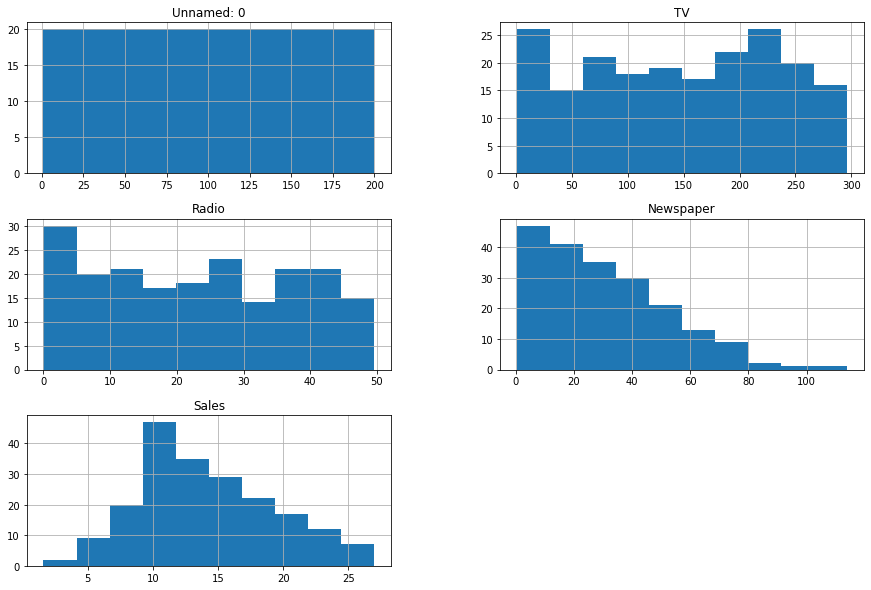

In [5]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(15,10))
plt.show()

# 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.median()

Unnamed: 0    100.50
TV            149.75
Radio          22.90
Newspaper      25.75
Sales          12.90
dtype: float64

In [8]:
n1=np.percentile(data['TV'],75)
n2=np.percentile(data['Radio'],75)
n3=np.percentile(data['Newspaper'],75)
n4=np.percentile(data['Sales'],75)
print('The 75th percentile of TV is',n1,',the 75th percentile of Radio is',n2,'the 75th percentile of Newspaper is',n3,'the 75th percentile of Sales is',n4)

The 75th percentile of TV is 218.825 ,the 75th percentile of Radio is 36.525 the 75th percentile of Newspaper is 45.1 the 75th percentile of Sales is 17.4


# 3. Draw a scatter plot between TV and sales and write your insights

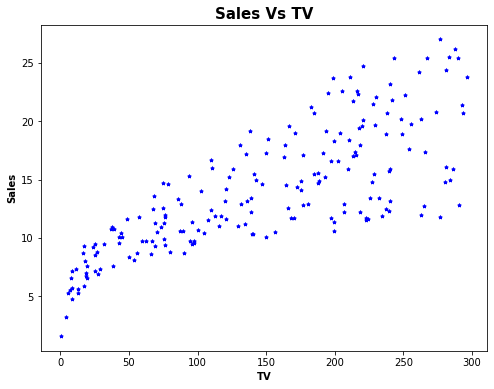

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(data['TV'],data['Sales'],s=12,color='blue',marker='*')
plt.title("Sales Vs TV",fontsize =15,fontweight='bold')
plt.xlabel('TV',fontweight='bold')
plt.ylabel('Sales',fontweight='bold')
plt.show()

As the amount spent on the adversitement on TV increases, the sales also show an increasing trend

# 4. Do a correlation analysis on the data set

In [10]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
data1=data.drop(['Unnamed: 0'],axis=1)

<AxesSubplot:>

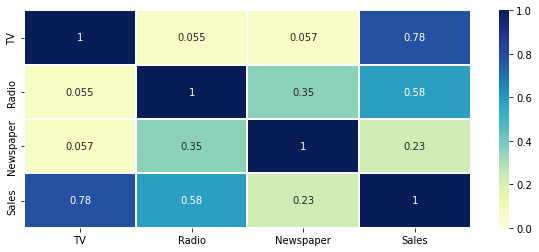

In [13]:
corrmatrix=data1.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-0,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

***5. Fit a linear regression model on the dataset***

In [27]:
y=data1['Sales']
x=data1.drop(['Sales','TV'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.3)

In [28]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)

112    14.1
165    11.9
12      9.2
73     11.0
144    11.4
20     18.0
199    13.4
8       4.8
39     21.5
88     12.9
81     12.3
197    12.8
69     22.3
160    14.4
25     12.0
99     17.2
151    11.6
23     15.5
138     9.6
159    12.9
89     16.7
82     11.3
24      9.7
174    11.5
137    20.8
83     13.6
107     8.7
34      9.5
97     15.5
167    12.2
123    15.2
157    10.1
75      8.7
152    16.6
117     9.4
149    10.1
63     14.0
54     20.2
125    10.6
80     11.8
170     8.4
183    26.2
38     10.1
153    19.0
40     16.6
190    10.8
177    11.7
131    12.7
13      9.7
121     7.0
1      10.4
116    12.2
100    11.7
166     8.0
168    17.1
48     14.8
178    11.8
108     5.3
61     24.2
16     12.5
Name: Sales, dtype: float64


In [29]:
print(predictions)

[12.21883419 10.41532971 17.03123054 10.4097506  12.43028999 15.32928359
 10.82057028  9.3561687  17.27250953 15.04422421 10.11910465 10.94912518
 18.556192   13.06095369  9.8284631  18.25902267 11.15033279 12.76192568
 14.63714518 13.16156079 19.6172275  13.54908769 11.76702741  9.74741911
 15.64507923 18.76299541  9.17730607  9.26580673 13.60125673 10.19176921
 16.4257306   9.4018104  19.09275528 14.02138912  9.20618585 14.61665097
 15.31718198 15.21564115 11.66641811 14.82531876 11.5537015  18.77882491
 14.94455524 17.75412191 13.96921876 17.75692267 10.8960211   9.91881935
 10.59233981 14.01579288 17.73735253 12.19926712 10.28212415 17.15420415
 14.48995254 12.74701629  9.61047863  9.22108866 18.55525519 17.80068504]


In [30]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 14.65076025518479
